# ASDS 6304, Project 1

Submitted on 10th September, 2024 by Soham Agarkar and Utkarsh Pant.

In [133]:
import sklearn
import seaborn
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from scipy.optimize import minimize, minimize_scalar, linprog

## Q1: Given $𝑓(𝑥) = 2𝑥^4 − 10𝑥^2 + 𝑥 − 5$, draw the curve and find min $𝑓(𝑥)$ by the package SciPy in python. Interpret your result.


Function definition:


In [134]:
def f1(x):
    return (2 * (x ** 4)) - (10 * (x ** 2)) + x - 5

Finding the local minima:


In [135]:
minima_f1 = minimize_scalar(f1,
                            method='bounded',
                            bounds=[-3, 3])

Plotting $f(x)$:


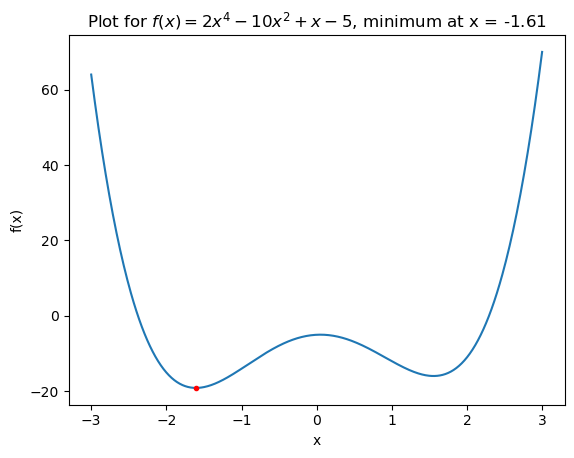

In [136]:
# set white background for matplotlib
plt.style.use('default')

# 3d plot of f(x) using seaborn
x = np.linspace(-3, 3, 500)
Y = f1(x)

# plot f(x) and set palette to rocket
plt.plot(x, Y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot([minima_f1.x], [minima_f1.fun], 'r.')
plt.title('Plot for $f(x) = 2x^4 - 10x^2 + x - 5$, minimum at x = %.2f' % minima_f1.x)

plt.show()
# plot.set(xlabel='x', ylabel='f(x)', title='$f(x) = 2x^4 - 10x^2 + x - 5$')

## Q2: Given $𝑓(𝑥, 𝑦) = 2𝑥^4 − 10𝑦^2 + 𝑥 − 𝑦 − 25$
1. Draw the graph of $f(x, y)$
2. $min 𝑓(𝑥, 𝑦)$ and $max 𝑓(𝑥, 𝑦)$.  If one of them can’t be solved, please add some constraints so that you can solve it.

Function definition:

In [137]:
def f2(args):
    x, y = args
    return (2 * (x ** 4)) - (10 * (y ** 2)) + x - y - 25

Calculate the maxima and minima

In [138]:
# maximise
maxima_f2 = minimize(lambda x: -f2(x),
                        x0=[0, 0],
                        bounds=[(-4, 4)])

maxima_f2

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -491.02499999999986
        x: [ 4.000e+00 -5.000e-02]
      nit: 4
      jac: [-5.130e+02  0.000e+00]
     nfev: 27
     njev: 9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [139]:
minima_f2 = minimize(f2,
                     x0=[0, 0],
                     bounds=[(-4, 4)])

minima_f2

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -189.37499999999946
        x: [-5.000e-01  4.000e+00]
      nit: 15
      jac: [-2.842e-06 -8.100e+01]
     nfev: 72
     njev: 24
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

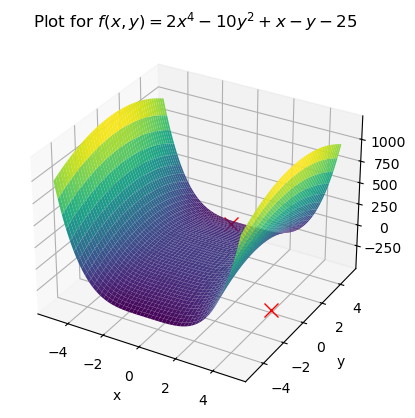

In [140]:
X = np.linspace(-5, 5, 500)
Y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(X, Y)
Z = f2([X, Y])

# 3d plot of f(x, y) using matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')

# plot maxima and minima points on the surface
ax.plot([maxima_f2.x[0]],
        [maxima_f2.x[1]],
        [maxima_f2.fun],
        'rx',
        markersize=10)
ax.plot([minima_f2.x[0]],
        [minima_f2.x[1]],
        [minima_f2.fun],
        'rx',
        markersize=10)

# set title and axis labels
plt.title('Plot for $f(x, y) = 2x^4 - 10y^2 + x - y - 25$')

plt.show()


## Q5

A small company has developed two versions of a new product. Each version of the product is made from the same raw material that costs __$10/g__ and requires two different types of specialized labor. $U$ is the higher-priced version of the product. $U$ sells for __$270 per unit__ and requires __10g__ of raw material, __1 hour of labor type $A$__, and __2 hours of labor type B.__

Due to the higher price, the market demand for $U$ is limited to __40 units per week.__ $V$ is the lower-priced version of the product that sells for __$210 per unit__ with __unlimited demand__ and requires __9g of raw material, 1 hour of labor type A, and 1 hour of labor type B.__ The availability of labor and the raw materials inventory limits weekly production in the company. The raw material must be ordered in advance and has a short shelf life. Any raw material left over at the end of the week is discarded.

The availability of labor and the raw materials inventory limits weekly 
production in the company. The raw material must be ordered in advance and 
has a short shelf life. Any raw material left over at the end of the week is 
discarded. The table below details the cost and availability of raw materials and 
labor.

| Resource | Amount Available | Cost |
|----------|------------------|------|
| Raw material | No limits | $10/g |
| Labor A | 80 hours | $50/hr |
| Labor B | 100 hours | $40/hr |


Ans:

**Variables that determine the optimisation:**
- $x_U$: No. of units of  $U$ produced per week
- $x_V$: No. of units of $V$ produced per week
- $R$: Raw material consumed per week

**Objective Function:**

The goal is to maximize the gross profit, which is the revenue from selling products - cost of raw materials and labor.

- Earnings from $U$: $270 \times x_U$
- Revenue from $V$: $210 \times x_V$
- Cost of raw materials: $10 \times R$
- Cost of labor $A$: $50 \times (x_U + x_V)$
- Cost of labor $B$: $40 \times (2x_U + x_V)$
- Objective function:  $max( 270x_U + 210x_V - 10R - 50(x_U + x_V) - 40(2x_U + x_V))$

**Constraints:**
- Raw material constraint: $10x_U + 9x_V \leq R$
- Labor A constraint: $x_U + x_V \leq 80$
- Labor B constraint: $2x_U + x_V \leq 100$
- Demand constraint for U: $x_U \leq 40$
- Non-negativity constraints: $x_U \geq 0, x_V \geq 0, R \geq 0$


In [141]:
# Coefficients for the objective function
# Coefficients for x_U, x_V, R
c = [-1 * (270 - 50 - 80), -1 * (210 - 50 - 40), 10]

# Coefficients for the inequality constraints
A = [
    [10, 9, -1],  # 10x_U + 9x_V <= R
    [1, 1, 0],    # x_U + x_V <= 80
    [2, 1, 0],    # 2x_U + x_V <= 100
    [-1, 0, 0],   # -x_U <= -40 (x_U <= 40)
]

# list for rhs
b = [0, 80, 100, -40]

# bounds
x_bounds = (0, None)
R_bounds = (0, None)
bounds = [x_bounds, x_bounds, R_bounds]

result = linprog(c,
                 A_ub=A,
                 b_ub=b,
                 bounds=bounds)

# Extract the results
x_U, x_V, R = result.x

print(f"Optimal number of units of U to produce: {x_U}")
print(f"Optimal number of units of V to produce: {x_V}")
print(f"Optimal amount of raw material to order: {R} grams")
print(f"Maximum gross profit: {-result.fun}")

Optimal number of units of U to produce: 40.0
Optimal number of units of V to produce: 20.0
Optimal amount of raw material to order: 580.0 grams
Maximum gross profit: 2200.0


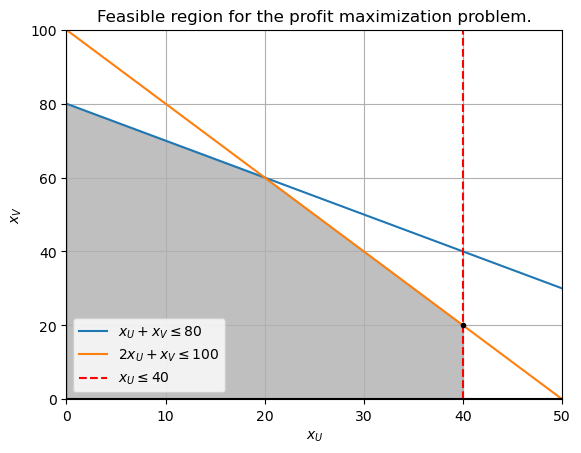

In [145]:
# Define the constraints
x_U = np.linspace(0, 50, 400)

# Constraints
x_V1 = 80 - x_U
x_V2 = 100 - 2 * x_U

plt.plot(x_U, x_V1, label=r'$x_U + x_V \leq 80$')
plt.plot(x_U, x_V2, label=r'$2x_U + x_V \leq 100$')

plt.axvline(x=40, color='r', linestyle='--', label=r'$x_U \leq 40$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# feasible region
plt.fill_between(x_U, np.maximum(0, np.minimum(x_V1, x_V2)), where=(x_U <= 40), color='gray', alpha=0.5)

plt.xlim((0, 50))
plt.ylim((0, 100))
plt.title('Feasible region for the profit maximization problem.')
plt.grid(True)
plt.xlabel(r'$x_U$')
plt.ylabel(r'$x_V$')

plt.plot(result.x[0], result.x[1], 'k.')
plt.legend()

plt.show()

These results show that the maximum profit is achieved by producing 40 units of U and 20 units of V, for which we will require 580.00 grams of raw material. This minimizes production and labor costs, while maximizing gross profits.